# Linear Regression / Ordinary Least Squares

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = {
    'mesin x': [1000, 2000, 3000, 4000, 5000],
    'harga y': [10, 25, 35, 55, 80]
}
df = pd.DataFrame(data)
df

,mesin x,harga y
0,1000,10
1,2000,25
2,3000,35
3,4000,55
4,5000,80


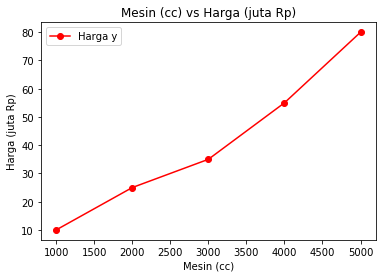

In [8]:
plt.plot(df['mesin x'], df['harga y'], 'ro-')
plt.xlabel('Mesin (cc)')
plt.ylabel('Harga (juta Rp)')
plt.title('Mesin (cc) vs Harga (juta Rp)')
plt.legend(['Harga y'])

In [9]:
# check correlation antara x & y
df.corr()

,mesin x,harga y
mesin x,1.00000,0.98644
harga y,0.98644,1.00000


In [10]:
# dataframe untuk menghitung m (slope) & c (intercept)
df['xy'] = df['mesin x'] * df['harga y']
df['x^2'] = df['mesin x'] ** 2
df['y^2'] = df['harga y'] ** 2
df

,mesin x,harga y,xy,x^2,y^2
0,1000,10,10000,1000000,100
1,2000,25,50000,4000000,625
2,3000,35,105000,9000000,1225
3,4000,55,220000,16000000,3025
4,5000,80,400000,25000000,6400


<hr>

### Linear Regression: Gradient (m) & Intercept (c)

- Gradient/slope $\displaystyle m = \frac {n(\sum xy) - (\sum x) (\sum y)} {n (\sum x^2) - (\sum x)^2}$

In [11]:
# m (slope/gradient)
m = ( (df['mesin x'].count() * df['xy'].sum()) - (df['mesin x'].sum() * df['harga y'].sum()) ) / ( (df['mesin x'].count() * df['x^2'].sum()) - (df['mesin x'].sum() ** 2) )
m

0.017

- Intercept $\displaystyle c = \frac {(\sum y)(\sum x^2) - (\sum x) (\sum xy)} {n(\sum x^2) - (\sum x)^2}$

In [12]:
# c intercept
c = ( (df['harga y'].sum() * df['x^2'].sum()) - (df['mesin x'].sum() * df['xy'].sum()) ) / ( (df['mesin x'].count() * df['x^2'].sum()) - (df['mesin x'].sum() ** 2) )
c

-10.0

- Prediction $\displaystyle \hat{y} = mx + c$

In [13]:
# prediksi harga berdasarkan linear regression y' = mx + c
df['harga ŷ'] = m * df['mesin x'] + c
df

,mesin x,harga y,xy,x^2,y^2,harga ŷ
0,1000,10,10000,1000000,100,7.0
1,2000,25,50000,4000000,625,24.0
2,3000,35,105000,9000000,1225,41.0
3,4000,55,220000,16000000,3025,58.0
4,5000,80,400000,25000000,6400,75.0


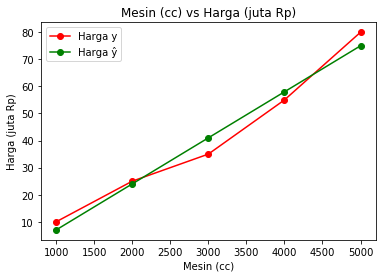

In [14]:
# plot data & prediksi
plt.plot(df['mesin x'], df['harga y'], 'ro-')
plt.plot(df['mesin x'], df['harga ŷ'], 'go-')
plt.xlabel('Mesin (cc)')
plt.ylabel('Harga (juta Rp)')
plt.title('Mesin (cc) vs Harga (juta Rp)')
plt.legend(['Harga y', 'Harga ŷ'])

In [15]:
# selisih harga y dengan harga prediksi ŷ 
df["|y-ŷ|"] = np.abs(df['harga y'] - df['harga ŷ'])
# selisih y-ŷ ** 2
df["|y-ŷ|^2"] = (np.abs(df['harga y'] - df['harga ŷ'])) ** 2

# selisih harga y dengan harga rata-rata y̅
df["|y-y̅|"] = np.abs(df['harga y'] - df['harga y'].mean())
# selisih y-y̅ ** 2
df["|y-y̅|^2"] = (np.abs(df['harga y'] - df['harga y'].mean())) ** 2

# elog(1+y) => ln(1+y) logaritma natural
df['ln(1+y)'] = np.log(1 + df['harga y'])
# elog(1+ŷ) => ln(1+ŷ) logaritma natural
df['ln(1+ŷ)'] = np.log(1 + df['harga ŷ'])
# selisih ln(1+y) & ln(1+ŷ) ** 2
df['|ln(1+y)-ln(1+ŷ)|^2'] = (np.abs(df['ln(1+y)'] - df['ln(1+ŷ)'])) ** 2

# %error = |y-ŷ/y|
df['%error'] = np.abs((df['harga y'] - df['harga ŷ']) / df['harga y'])
# %error^2 = |y-ŷ/y| ** 2
df['%err^2'] = (np.abs((df['harga y'] - df['harga ŷ']) / df['harga y'])) ** 2

df

,mesin x,harga y,xy,x^2,y^2,harga ŷ,|y-ŷ|,|y-ŷ|^2,|y-y̅|,|y-y̅|^2,ln(1+y),ln(1+ŷ),|ln(1+y)-ln(1+ŷ)|^2,%error,%err^2
0,1000,10,10000,1000000,100,7.0,3.0,9.0,31.0,961.0,2.397895,2.079442,0.101413,0.300000,0.090000
1,2000,25,50000,4000000,625,24.0,1.0,1.0,16.0,256.0,3.258097,3.218876,0.001538,0.040000,0.001600
2,3000,35,105000,9000000,1225,41.0,6.0,36.0,6.0,36.0,3.583519,3.737670,0.023762,0.171429,0.029388
3,4000,55,220000,16000000,3025,58.0,3.0,9.0,14.0,196.0,4.025352,4.077537,0.002723,0.054545,0.002975
4,5000,80,400000,25000000,6400,75.0,5.0,25.0,39.0,1521.0,4.394449,4.330733,0.004060,0.062500,0.003906


<hr>

### Evaluation Metrics Linear Regression

#### 1. Max Error

- __Error__ aka __Residual__: selisih antara y & $\hat{y}$ 

- Max Error mencari error/residual terbesar $\displaystyle maxErr = max(| y - \hat{y} |)$

In [16]:
maxErr = round(df['|y-ŷ|'].max())
maxErr

6.0

#### 2. MAE (Mean Absolute Error)

- Mean Absolute Error $\displaystyle = \frac {1} {n} \sum | y - \hat{y} |$

In [17]:
MAE = round((1/df['mesin x'].count()) * df['|y-ŷ|'].sum(), 2)
MAE

3.6

#### 3. MSE (Mean Squared Error)

- __Sum Squared Error (SSE)__ $\displaystyle = \sum ( y - \hat{y} ) ^ 2$

- __Mean Squared Error__ = rata-rata dari SSE

- Mean Squared Error $\displaystyle = \frac {1} {n} \sum ( y - \hat{y} ) ^ 2$

In [18]:
MSE = round((1/df['mesin x'].count()) * df['|y-ŷ|^2'].sum(), 2)
MSE

16.0

#### 4. RMSE (Root of MSE)

- Root of Mean Squared Error $=\displaystyle \sqrt {\frac {1} {n} \sum ( y - \hat{y} ) ^ 2}$

In [19]:
RMSE = np.sqrt(MSE)
RMSE

4.0

#### 5. MedAE (Median Absolute Error)

- MedAE $= median (| y_1 - \hat{y}_1 | , ... , | y_n - \hat{y}_n |)$

In [20]:
MedAE = df['|y-ŷ|'].median()
MedAE

3.0

#### 6. MSLE (Mean Squared Logarithmic Error)

- MSLE $= \frac {1} {n} \sum (^elog(1 + y_i) - ^elog(1 + \hat{y}_i)) ^ 2 = \frac {1} {n} \sum (\ln(1 + y_i) - \ln(1 + \hat{y}_i)) ^ 2$ 
- Di mana $\ln{x} =  ^e\log{x}$, dengan $e$ adalah bilangan Euler

In [21]:
MSLE = (1/df['mesin x'].count()) * df['|ln(1+y)-ln(1+ŷ)|^2'].sum()
MSLE

0.026699306626327746

#### 7. RMSLE (Root of MSLE)

- RMSLE $= \sqrt{\frac {1} {n} \sum (\ln(1 + y_i) - \ln(1 + \hat{y}_i)) ^ 2}$ 

In [22]:
RMSLE = np.sqrt(MSLE)
RMSLE

0.16339922468092602

#### 8. MAPE (Mean Absolute Percentage Error)

- MAPE $\displaystyle = \frac {1} {n} \sum \left | \frac {y - \hat{y}} {y} \right | $

In [23]:
MAPE = (1/df['mesin x'].count()) * df['%error'].sum()
MAPE

0.12569480519480522

#### 9. MSPE (Mean Squared Percentage Error)

- MSPE $\displaystyle = \frac {1} {n} \sum \left ( \frac {y - \hat{y}} {y} \right ) ^ 2 $

In [24]:
MSPE = (1/df['mesin x'].count()) * df['%err^2'].sum()
MSPE

0.025573842342722225

#### 10. R<sup>2</sup> Score (Coefficient of Determination)

- $\displaystyle R^2 \textrm{score} = 1 - \frac {\sum (y - \hat{y}) ^ 2} {\sum (y - \bar{y}) ^ 2}$

- Nilai $\displaystyle \sqrt {R^2 \textrm{score}} = \textrm{correlation}$

In [25]:
R2 = 1 - (df['|y-ŷ|^2'].sum() / df['|y-y̅|^2'].sum())
R2

0.9730639730639731

In [28]:
# akarpangkat2 dari R2 = correlation!
R2 ** (0.5)

0.9864400504156211